In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
test= pd.read_csv('test.csv')
train= pd.read_csv('train.csv')

In [4]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


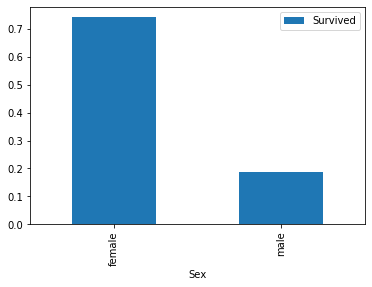

In [8]:
sex_pivot= train.pivot_table(index='Sex',values='Survived')
sex_pivot.plot.bar()
plt.show()

In [10]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

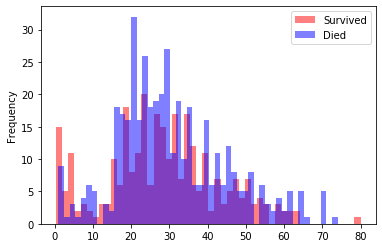

In [11]:
survived= train[train['Survived']==1]
died= train[train['Survived']==0]
survived["Age"].plot.hist(alpha=0.5,color='red',bins=50)
died["Age"].plot.hist(alpha=0.5,color='blue',bins=50)
plt.legend(['Survived','Died'])
plt.show()


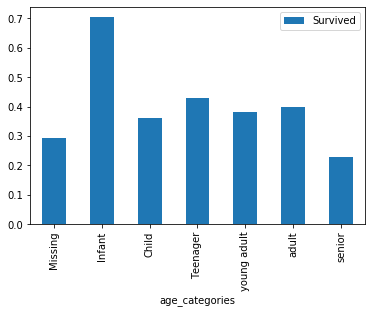

In [15]:
def process_age(df,cut_points,label_names) :
    df["Age"]= df["Age"].fillna(-0.5)
    df["age_categories"]=pd.cut(df["Age"],cut_points,labels=label_names)
    return df

cut_points=[-1,0,5,12,18,35,60,100]
label_names=["Missing","Infant","Child","Teenager","young adult","adult","senior"]
train= process_age(train,cut_points,label_names)
test= process_age(test,cut_points,label_names)

pivot= train.pivot_table(index="age_categories",values='Survived')
pivot.plot.bar()
plt.show()

In [19]:
def create_dummies(df,column_name) :
    dummies= pd.get_dummies(df[column_name],prefix=column_name)
    df= pd.concat([df,dummies],axis=1)
    return df
for column in ["Pclass","Sex","age_categories"]:
               train= create_dummies(train,column)
               test= create_dummies(test,column)

In [20]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()

In [21]:
columns = ['Pclass_2', 'Pclass_3', 'Sex_male']
lr.fit(train[columns], train['Survived'])

C:\Users\Chaitanya Kaul\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
from sklearn.linear_model import LogisticRegression

columns = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'age_categories_Missing','age_categories_Infant',
       'age_categories_Child', 'age_categories_Teenager',
       'age_categories_young adult', 'age_categories_adult',
      'age_categories_senior']

lr = LogisticRegression()
lr.fit(train[columns], train["Survived"])

C:\Users\Chaitanya Kaul\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
holdout=test
from sklearn.model_selection import train_test_split

all_X = train[columns]
all_y = train['Survived']

train_x, test_x, train_y, test_y = train_test_split(
    all_X, all_y, test_size=0.20,random_state=0)

In [45]:
lr.fit(train_x,train_y)
predictions= lr.predict(test_x)

C:\Users\Chaitanya Kaul\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [46]:
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(test_y,predictions)

In [47]:
print(accuracy)

0.8100558659217877


In [48]:
from sklearn.model_selection import cross_val_score

lr= LogisticRegression()
scores = cross_val_score(lr,all_X,all_y,cv=10)
scores.sort()
accuracy= scores.mean()
print(scores)
print(accuracy)

C:\Users\Chaitanya Kaul\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Chaitanya Kaul\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Chaitanya Kaul\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Chaitanya Kaul\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Chaitanya Kaul\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to '

[0.76404494 0.76404494 0.7752809  0.78651685 0.8        0.80681818
 0.80898876 0.81111111 0.83146067 0.87640449]
0.8024670865963002


In [51]:
lr= LogisticRegression()
lr.fit(all_X,all_y)
holdout_predictions= lr.predict(holdout[columns])

C:\Users\Chaitanya Kaul\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [60]:
holdout_ids= holdout['PassengerId']
submission_df= {"PassengerId" : holdout_ids,
               "Survived":holdout_predictions}
submission= pd.DataFrame(submission_df)

In [61]:
submission.to_csv("submission.csv",index=False)